In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the Fraud_Data.csv
fraud_data = pd.read_csv('./Cleaneddata/Cleaned FraudData.csv')


In [3]:
# Read the IpAddress_to_Country.csv and convert IP address columns to int
ip_to_country = pd.read_csv('./Cleaneddata/cleaned_ip_mapping_dataset.csv', dtype={'lower_bound_ip_address': int, 'upper_bound_ip_address': int})


In [4]:
fraud_data['ip_address'] = fraud_data['ip_address'].astype('int32')
ip_to_country['lower_bound_ip_address'] = ip_to_country['lower_bound_ip_address'].astype('int32')
ip_to_country['upper_bound_ip_address'] = ip_to_country['upper_bound_ip_address'].astype('int32')

In [5]:
ip_to_country.dtypes

lower_bound_ip_address     int32
upper_bound_ip_address     int32
country                   object
dtype: object

In [5]:
merged_data = pd.merge_asof(fraud_data.sort_values('ip_address'), ip_to_country.sort_values('lower_bound_ip_address'),
                            left_on='ip_address', right_on='lower_bound_ip_address',
                            direction='forward')

In [7]:
# Save the cleaned dataset
merged_data.to_csv('merged_Dataset.csv', index=False)

In [6]:
print(merged_data.shape)

(150247, 21)


In [8]:
fraud_percentage = (merged_data['class'].sum() / merged_data['class'].count()) * 100
print(f"Percentage of fraudulent transactions: {fraud_percentage:.2f}%")

Percentage of fraudulent transactions: 9.37%


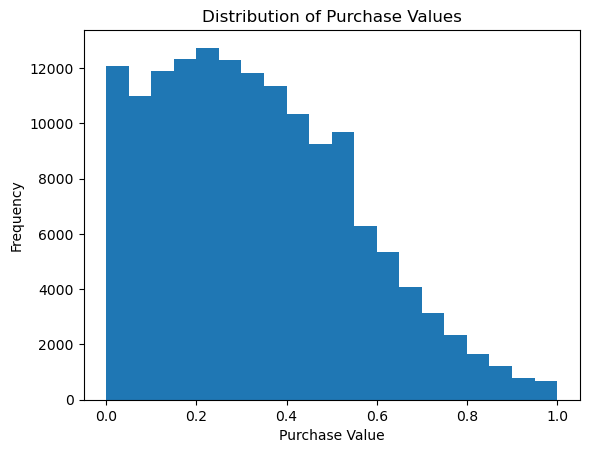

In [9]:
plt.hist(merged_data['purchase_value'], bins=20)
plt.xlabel('Purchase Value')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase Values')
plt.show()

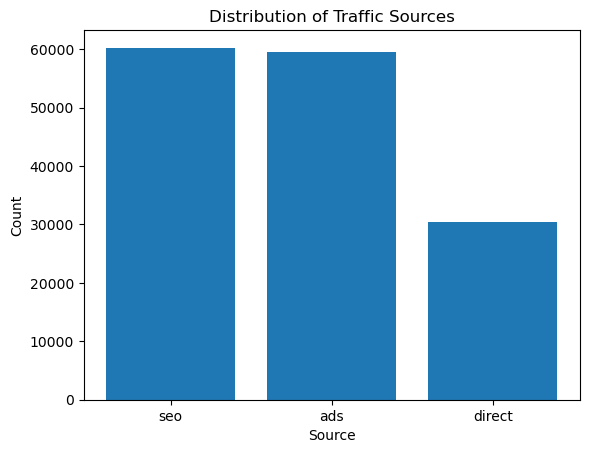

In [10]:
source_counts = merged_data['source'].value_counts()
plt.bar(source_counts.index, source_counts.values)
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Distribution of Traffic Sources')
plt.show()

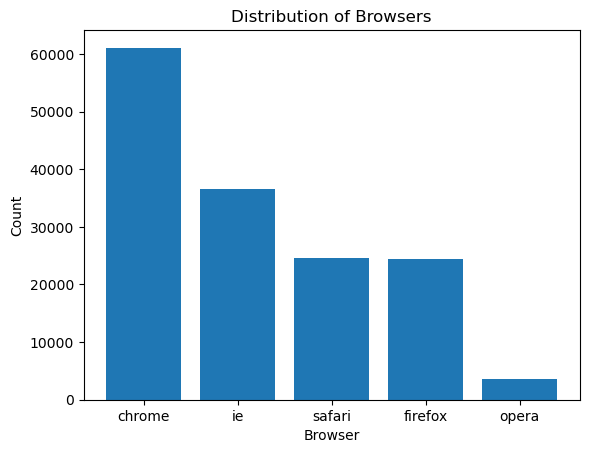

In [11]:
browser_counts = merged_data['browser'].value_counts()
plt.bar(browser_counts.index, browser_counts.values)
plt.xlabel('Browser')
plt.ylabel('Count')
plt.title('Distribution of Browsers')
plt.show()

In [20]:
browser_counts = merged_data['browser'].value_counts()

# Print the distribution of browsers
for browser, count in browser_counts.items():
    print(f"{browser}: {count}")

chrome: 61096
ie: 36498
safari: 24521
firefox: 24477
opera: 3655


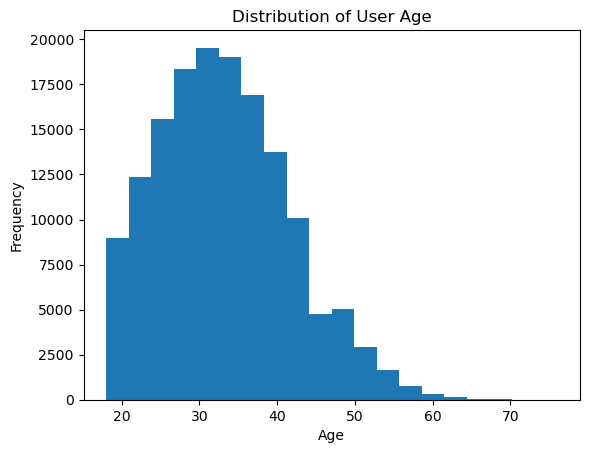

In [12]:
plt.hist(merged_data['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of User Age')
plt.show()

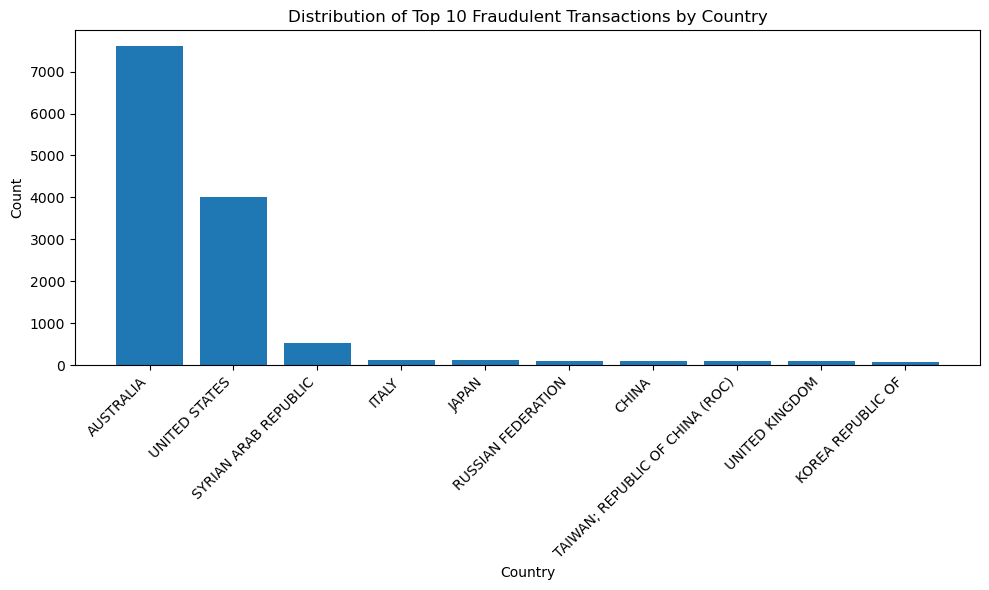

In [13]:
top_fraud_country_counts = merged_data[merged_data['class'] == 1]['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_fraud_country_counts.index, top_fraud_country_counts.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Top 10 Fraudulent Transactions by Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

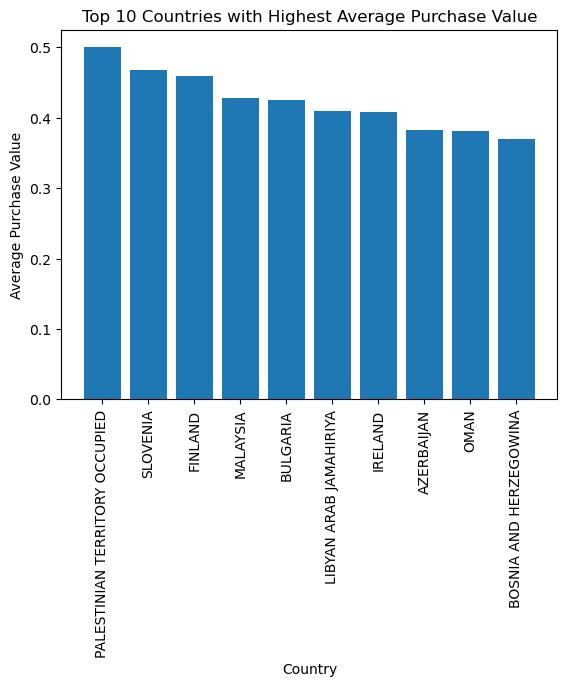

In [14]:
top_countries_average_purchase = merged_data.groupby('country')['purchase_value'].mean().nlargest(10)
plt.bar(top_countries_average_purchase.index, top_countries_average_purchase.values)
plt.xlabel('Country')
plt.ylabel('Average Purchase Value')
plt.title('Top 10 Countries with Highest Average Purchase Value')
plt.xticks(rotation=90)
plt.show()

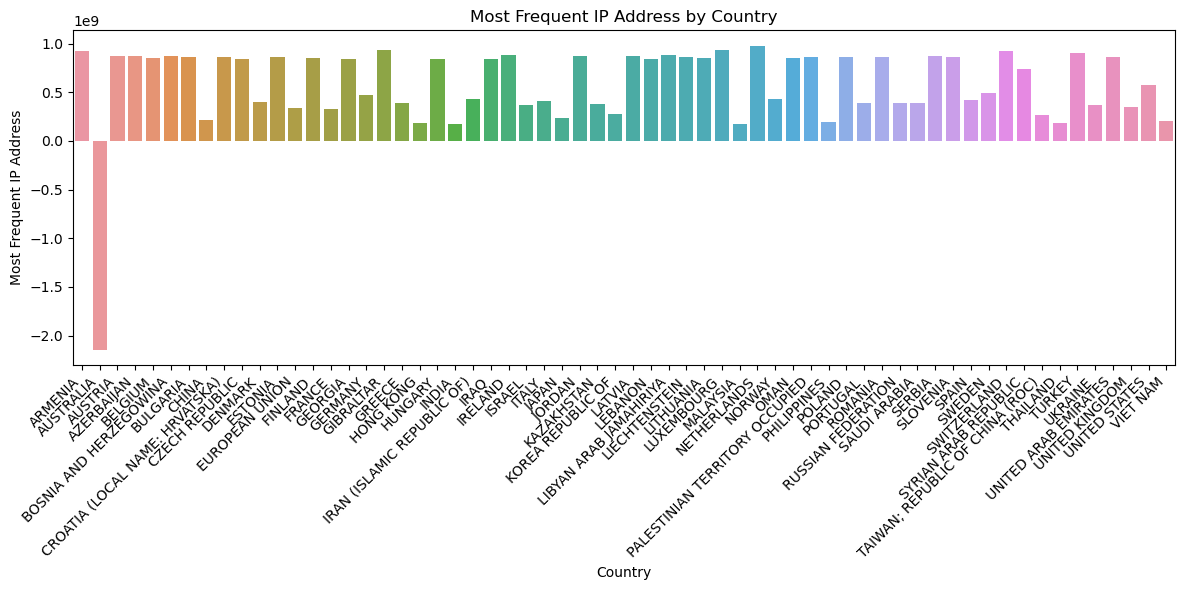

In [15]:
import seaborn as sns

# Group the data by country and find the most frequent IP address for each country
top_ip_by_country = merged_data.groupby('country')['ip_address'].agg(lambda x: x.value_counts().index[0])

# Reset the index to convert the grouped data into a DataFrame
top_ip_by_country = top_ip_by_country.reset_index()

# Plot the countries and their most frequent IP addresses
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='ip_address', data=top_ip_by_country)
plt.xlabel('Country')
plt.ylabel('Most Frequent IP Address')
plt.title('Most Frequent IP Address by Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()